<a href="https://colab.research.google.com/github/AmirKage/Assignment_xyz/blob/main/01_PA_Data%20Science%20Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment: Data Science Basics

In this programming assignment you need to apply your new `numpy`, `pandas` and `matplotlib` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)`s to solve the task.

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

Pandas allows you to load the required data sets directly from github:

In [2]:
# Load Data
transactions    = pd.read_csv('https://github.com/NikoStein/pds_data/raw/main/data/sales_train.csv.gz')
items           = pd.read_csv('https://github.com/NikoStein/pds_data/raw/main/data/items.csv')
item_categories = pd.read_csv('https://github.com/NikoStein/pds_data/raw/main/data/item_categories.csv')

## Get to know the data
Print the **shape** of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.

In [7]:
print("Transactions shape:", transactions.shape)
print("Items shape:", items.shape)
print("Item Categories shape:", item_categories.shape)

print(transactions.head())
print(items.head())
print(item_categories.head())

Transactions shape: (2935849, 6)
Items shape: (22170, 3)
Item Categories shape: (84, 2)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2          

## Maximum total revenue among all the shops

Now use your `pandas` skills to get answers for the following questions.
The first question is:

What was the maximum total revenue among all the shops in July, 2013?

* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset.
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 13` and `df.month == 6` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
# Convert the date column to datetime format
transactions['date'] = pd.to_datetime(transactions['date'], format='%d.%m.%Y')

# Extract year and month from the date
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month

# Calculate revenue
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']

# Filter for July 2013 data
july_2013_data = transactions[(transactions['year'] == 2013) & (transactions['month'] == 7)]

# Group by shop and find the maximum revenue
shop_revenue = july_2013_data.groupby('shop_id')['revenue'].sum()
max_revenue = shop_revenue.max()

print("The maximum total revenue among all shops in July 2013 is:", max_revenue)


The maximum total revenue among all shops in July 2013 is: 4886087.749999942


In [9]:
# Save the final value in this variable
max_revenue = 4886087.749999942

In addition we can find the index (shop id) of the row with the max value in the column using ```idxmax()```

In [11]:
max_revenue_shop_id = shop_revenue.idxmax()
max_revenue = shop_revenue.max()

print("The shop ID with the maximum revenue in July 2013 is:", max_revenue_shop_id)
print("The maximum revenue for this shop is:", max_revenue)

The shop ID with the maximum revenue in July 2013 is: 31
The maximum revenue for this shop is: 4886087.749999942


## Constant price

How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?

* Let's assume, that the items are returned for the same price as they had been sold.

In [12]:
# Grouping each item to check price variations
price_variation = transactions.groupby('item_id')['item_price'].nunique()

# Counting items with only one unique price
constant_price_items = price_variation[price_variation == 1].count()

print("Number of items with constant price:", constant_price_items)

Number of items with constant price: 5926


In [13]:
# Save the final value in this variable
num_items_constant_price = 5926

## Variance of sold items per day

What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?

* Do not count the items that were sold but returned back later.
* Fill `total_num_items_sold`: An (ordered) array that contains the total number of items sold on each day
* Then compute variance of the of `total_num_items_sold`
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [32]:
transactions['date'] = pd.to_datetime(transactions['date'], format='%d.%m.%Y')

# Filter and creating dataframe for shop ID 25 and December 2014
shop_25_dec_2014 = transactions[(transactions['shop_id'] == 25) &
                                 (transactions['year'] == 2014) &
                                 (transactions['month'] == 12)]

# Filtering out returns (only keeping sold items)
shop_25_dec_2014 = shop_25_dec_2014[shop_25_dec_2014['item_cnt_day'] > 0]

# Grouping by date and calculating total items sold each day
daily_sales = shop_25_dec_2014.groupby('date')['item_cnt_day'].sum()

total_num_items_sold = daily_sales.values
print("Total number of items sold each day:", total_num_items_sold)

# Calculating the variance of the total number of sold items per day
variance_sold_items = daily_sales.var()

print("Variance of the number of sold items per day for shop ID 25 in December 2014 is:", variance_sold_items)


Total number of items sold each day: [ 153.  169.  195.  164.  300.  353.  326.  209.  204.  143.  214.  297.
  432.  306.  225.  192.  285.  326.  418.  579.  381.  318.  371.  434.
  506.  620.  746.  662. 1966.  776.]
Variance of the number of sold items per day for shop ID 25 in December 2014 is: 117211.10344827586


In [34]:
# Save the final value in this variable
total_num_items_sold = [153., 169., 195., 164., 300., 353., 326., 209., 204., 143.,
                        214., 297., 432., 306., 225., 192., 285., 326.,
                        418., 579., 381., 318., 371., 434., 506., 620.,
                        746., 662., 1966., 776.]

In [19]:
# Save the final value in this variable
total_num_items_sold_var = 117211.10344827586

## Visualization of the daily revenue

Use `total_num_items_sold` to plot the daily revenue of `shop_id = 25` in December, 2014.

* y-label: 'Num items'
* x-label: 'Day'
* plot-title: 'Daily revenue for shop_id = 25'
* use plt.show() to display the plot in the end

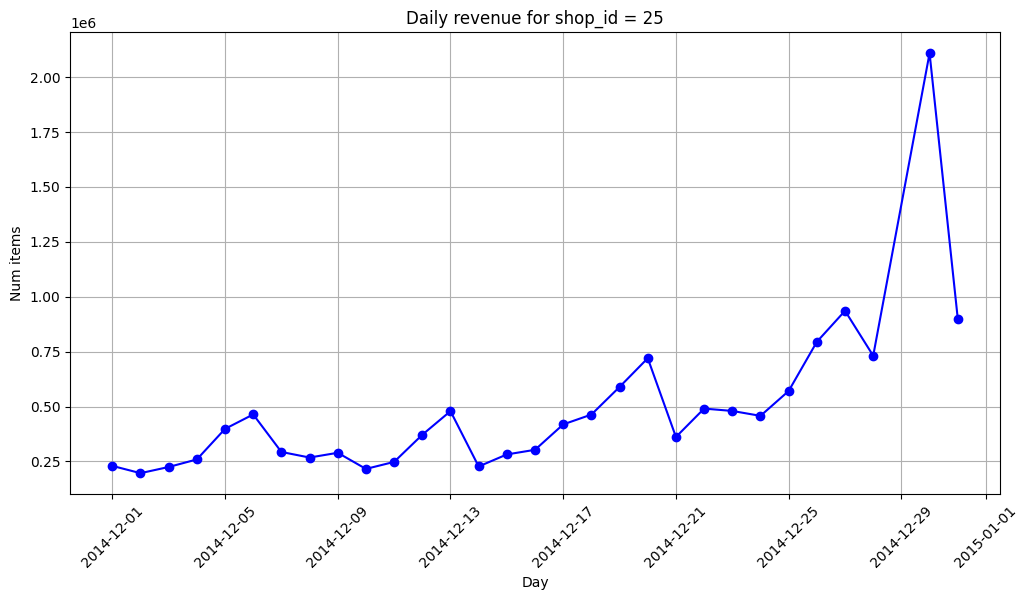

In [35]:
daily_prices = shop_25_dec_2014.groupby('date')['item_price'].mean()
daily_revenue = daily_sales * daily_prices

plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue, marker='o', linestyle='-', color='b')
plt.xlabel('Day')
plt.ylabel('Num items')
plt.title('Daily revenue for shop_id = 25')
# Rotateing x labels for better visibility
plt.xticks(rotation=45)
plt.grid()

plt.show()

## Final submission
Only for the submission (do not change the code).

In [36]:
print(max_revenue)
print(num_items_constant_price)
print(total_num_items_sold)
print(total_num_items_sold_var)

4886087.749999942
5926
[153.0, 169.0, 195.0, 164.0, 300.0, 353.0, 326.0, 209.0, 204.0, 143.0, 214.0, 297.0, 432.0, 306.0, 225.0, 192.0, 285.0, 326.0, 418.0, 579.0, 381.0, 318.0, 371.0, 434.0, 506.0, 620.0, 746.0, 662.0, 1966.0, 776.0]
117211.10344827586


## Bonus

What item category that generated the highest revenue in spring 2014?</b></li>

* Submit the `id` of the category found.
    
* Here, spring is the period from March to May.

In [38]:
# Filtering transactions for spring 2014 (March to May)
spring_2014 = transactions[(transactions['date'].dt.year == 2014) &
                           (transactions['date'].dt.month.isin([3, 4, 5]))].copy()

#Calculating revenue
spring_2014['revenue'] = spring_2014['item_price'] * spring_2014['item_cnt_day']

# Merging transactions with items and item categories
merged_data = spring_2014.merge(items, on='item_id').merge(item_categories, on='item_category_id')

# Grouping by item category and sum the revenue
category_revenue = merged_data.groupby('item_category_id')['revenue'].sum()

#Finding the category with the highest revenue
max_revenue_category_id = category_revenue.idxmax()
max_revenue_value = category_revenue.max()

print("Item category that generated the highest revenue in spring 2014 is:", max_revenue_category_id)
print("Total revenue for this category is:", max_revenue_value)

Item category that generated the highest revenue in spring 2014 is: 20
Total revenue for this category is: 33755407.40999937


In [39]:
# Save the final value in this variable
category_id_with_max_revenue = 20

In [40]:
print(category_id_with_max_revenue)

20
